In [1]:
#Importing all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import tkinter as tk
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
from matplotlib.pyplot import figure
from jupyterthemes import jtplot
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from sklearn import linear_model
from sklearn import metrics
from tkinter import *
from itertools import cycle
from tqdm.auto import tqdm
jtplot.style(theme='onedork')

In [2]:
#importing dataset
df = pd.read_csv(r"C:\Users\mihir\Desktop\portfolio projects\python prediction project\salary data no na.csv")
df = df.drop(columns=['company', 'cityid','dmaid', 'Highschool'])
#The dataset has already been cleaned by deleting empty/missing values and only keeping the relavant columns. The dataset can be found on the github repo for this project.
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

title - 0.0%
totalyearlycompensation - 0.0%
yearsofexperience - 0.0%
yearsatcompany - 0.0%
basesalary - 0.0%
stockgrantvalue - 0.0%
bonus - 0.0%
Masters_Degree - 0.0%
Bachelors_Degree - 0.0%
Doctorate_Degree - 0.0%


In [3]:
df.head()

,title,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,Masters_Degree,Bachelors_Degree,Doctorate_Degree
0,Product Manager,127000,1.5,1.5,107000,20000.0,10000.0,0,0,0
1,Software Engineer,100000,5.0,3.0,0,0.0,0.0,0,0,0
2,Product Manager,310000,8.0,0.0,155000,0.0,0.0,0,0,0
3,Software Engineering Manager,372000,7.0,5.0,157000,180000.0,35000.0,0,0,0
4,Software Engineer,157000,5.0,3.0,0,0.0,0.0,0,0,0


In [4]:
#Selecting top 10 titles that have the most records
df['title'].value_counts()[:10]

Software Engineer               41224
Product Manager                  4673
Software Engineering Manager     3568
Data Scientist                   2578
Hardware Engineer                2200
Product Designer                 1515
Technical Program Manager        1381
Solution Architect               1157
Management Consultant             976
Business Analyst                  885
Name: title, dtype: int64

In [5]:
#Creating a new df for just the values above
df = df[df.title.str.contains('Software Engineer|Product Manager|Software Engineering Manager|Data Scientist|Hardware Engineer|Product Designer|Technical Program Manager|Solution Architect|Management Consultant|Business Analyst')]


In [6]:
df.groupby(["title"])[["totalyearlycompensation"]].mean()

,totalyearlycompensation
title,
Business Analyst,129727.683616
Data Scientist,203656.710628
Hardware Engineer,213655.000000
Management Consultant,162795.081967
Product Designer,207706.930693
Product Manager,257813.396105
Software Engineer,205416.941733
Software Engineering Manager,354653.307175
Solution Architect,212736.387208


In [7]:
#Finding the average salarry for each position
gby = df.groupby(["title"],as_index=False)[["totalyearlycompensation"]].mean()
gby

,title,totalyearlycompensation
0,Business Analyst,129727.683616
1,Data Scientist,203656.710628
2,Hardware Engineer,213655.000000
3,Management Consultant,162795.081967
4,Product Designer,207706.930693
5,Product Manager,257813.396105
6,Software Engineer,205416.941733
7,Software Engineering Manager,354653.307175
8,Solution Architect,212736.387208
9,Technical Program Manager,237099.927589


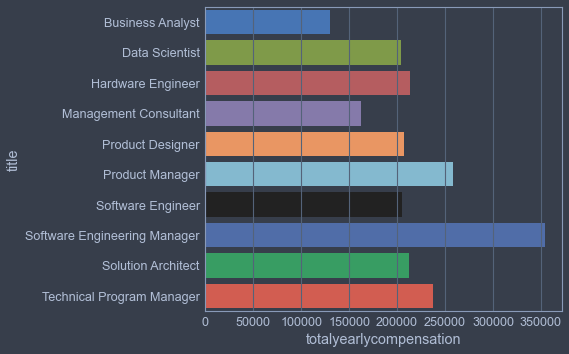

In [8]:
ax = sns.barplot(x="totalyearlycompensation", y="title", data=gby)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

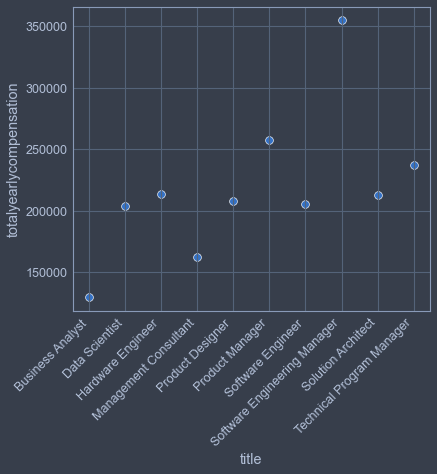

In [9]:
#Visualizing the average salaries for positions
sns.scatterplot(x="title", y="totalyearlycompensation", data=gby, s = 60)
plt.xticks(rotation=45, horizontalalignment='right')

In [10]:
df.head()

,title,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,Masters_Degree,Bachelors_Degree,Doctorate_Degree
0,Product Manager,127000,1.5,1.5,107000,20000.0,10000.0,0,0,0
1,Software Engineer,100000,5.0,3.0,0,0.0,0.0,0,0,0
2,Product Manager,310000,8.0,0.0,155000,0.0,0.0,0,0,0
3,Software Engineering Manager,372000,7.0,5.0,157000,180000.0,35000.0,0,0,0
4,Software Engineer,157000,5.0,3.0,0,0.0,0.0,0,0,0


In [11]:
#Extracting categorial column
newdf = df[['title']]
# unique values in each columns
for x in newdf.columns:
    #prinfting unique values
    print(x ,':', len(newdf[x].unique()))


title : 10


In [12]:
from sklearn.preprocessing import OneHotEncoder
# generate binary values using get_dummies
dum_df = pd.get_dummies(newdf, columns=["title"], prefix=["title_is"] )
# merge with main df bridge_df on key values
df = df.join(dum_df)
df

,title,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,Masters_Degree,Bachelors_Degree,Doctorate_Degree,title_is_Business Analyst,title_is_Data Scientist,title_is_Hardware Engineer,title_is_Management Consultant,title_is_Product Designer,title_is_Product Manager,title_is_Software Engineer,title_is_Software Engineering Manager,title_is_Solution Architect,title_is_Technical Program Manager
0,Product Manager,127000,1.5,1.5,107000,20000.0,10000.0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,Software Engineer,100000,5.0,3.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,Product Manager,310000,8.0,0.0,155000,0.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,Software Engineering Manager,372000,7.0,5.0,157000,180000.0,35000.0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,Software Engineer,157000,5.0,3.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62628,Software Engineer,327000,10.0,1.0,155000,150000.0,22000.0,0,0,0,0,0,0,0,0,0,1,0,0,0
62629,Software Engineer,237000,2.0,2.0,146900,73200.0,16000.0,0,0,0,0,0,0,0,0,0,1,0,0,0
62630,Software Engineer,220000,14.0,12.0,157000,25000.0,20000.0,0,0,0,0,0,0,0,0,0,1,0,0,0
62631,Software Engineer,280000,8.0,4.0,194688,57000.0,29000.0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [13]:
df = df.drop(columns=['title'])
df

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,Masters_Degree,Bachelors_Degree,Doctorate_Degree,title_is_Business Analyst,title_is_Data Scientist,title_is_Hardware Engineer,title_is_Management Consultant,title_is_Product Designer,title_is_Product Manager,title_is_Software Engineer,title_is_Software Engineering Manager,title_is_Solution Architect,title_is_Technical Program Manager
0,127000,1.5,1.5,107000,20000.0,10000.0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,100000,5.0,3.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,310000,8.0,0.0,155000,0.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,372000,7.0,5.0,157000,180000.0,35000.0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,157000,5.0,3.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62628,327000,10.0,1.0,155000,150000.0,22000.0,0,0,0,0,0,0,0,0,0,1,0,0,0
62629,237000,2.0,2.0,146900,73200.0,16000.0,0,0,0,0,0,0,0,0,0,1,0,0,0
62630,220000,14.0,12.0,157000,25000.0,20000.0,0,0,0,0,0,0,0,0,0,1,0,0,0
62631,280000,8.0,4.0,194688,57000.0,29000.0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [14]:
y = df["totalyearlycompensation"]
x = df.drop(["totalyearlycompensation"], axis=1)

From the correlation matrix displayed in the correlation project( https://github.com/Mihirk51/Correlation-between-Salaries-and-different-attributes-of-an-individual-in-the-STEM-field/blob/main/Salaries%20and%20attributes%20correlation.ipynb ), we can see that the selected independant variables have a positive correlation with the dependent variable (totalyearlycompensation). Therefore, we can conclude that a linear relationship exists between the independant variables and the dependant variable

In [15]:
from sklearn.model_selection import train_test_split
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [16]:
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(x_train,y_train)

LinearRegression()

In [17]:
#Running the prediction model on the test data
y_prediction =  LR.predict(x_test)
y_prediction

array([ 83879.32086838, 212461.36148409, 316579.01002451, ...,
       141663.96921864, 141940.44663128, 147987.62662941])

In [19]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from  sklearn import metrics
# predicting the accuracy score
r2= r2_score(y_test,y_prediction)
mse = mean_squared_error(y_test,y_prediction)
rmse = np.sqrt(mean_squared_error(y_test,y_prediction))
ae = metrics.mean_absolute_error(y_test, y_prediction)
print('absolute error is', ae)
print('r2 socre is ',r2)
print('mean_sqrd_error is ',mse)
print('root_mean_squared error of is ',rmse)

absolute error is 24812.194438752427
r2 socre is  0.7665729197911878
mean_sqrd_error is  4417534918.413681
root_mean_squared error of is  66464.53880388911


In [20]:
#Predicting using statsmodels
x = sm.add_constant(x)
full_model = sm.OLS(y, x).fit()
full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     totalyearlycompensation   R-squared:                       0.770
Model:                                 OLS   Adj. R-squared:                  0.770
Method:                      Least Squares   F-statistic:                 1.188e+04
Date:                     Sat, 30 Oct 2021   Prob (F-statistic):               0.00
Time:                             23:13:34   Log-Likelihood:            -7.5349e+05
No. Observations:                    60157   AIC:                         1.507e+06
Df Residuals:                        60139   BIC:                         1.507e+06
Df Model:                               17                                         
Covariance Type:                 nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                  4.395e+04    826.869     53.148      0.000    4.23e+04    4.56e+04
yearsofexperience                      2211.7606     62.323     35.488      0.000    2089.607    2333.915
yearsatcompany                          -79.6569     98.812     -0.806      0.420    -273.329     114.015
basesalary                                0.6523      0.005    119.210      0.000       0.642       0.663
stockgrantvalue                           0.9093      0.004    238.345      0.000       0.902       0.917
bonus                                     1.0766      0.011     94.152      0.000       1.054       1.099
Masters_Degree                        -1.285e+04    665.669    -19.307      0.000   -1.42e+04   -1.15e+04
Bachelors_Degree                      -1.837e+04    722.545    -25.430      0.000   -1.98e+04    -1.7e+04
Doctorate_Degree                       1025.4886   1664.402      0.616      0.538   -2236.746    4287.723
title_is_Business Analyst             -1.045e+04   2084.052     -5.015      0.000   -1.45e+04   -6366.043
title_is_Data Scientist                8055.7601   1299.298      6.200      0.000    5509.132    1.06e+04
title_is_Hardware Engineer              845.8146   1375.801      0.615      0.539   -1850.761    3542.390
title_is_Management Consultant        -3516.3861   1991.694     -1.766      0.077   -7420.113     387.341
title_is_Product Designer              4810.0874   1618.269      2.972      0.003    1638.274    7981.900
title_is_Product Manager               1.627e+04   1001.277     16.249      0.000    1.43e+04    1.82e+04
title_is_Software Engineer             5948.7349    560.967     10.604      0.000    4849.238    7048.232
title_is_Software Engineering Manager  3.016e+04   1166.758     25.848      0.000    2.79e+04    3.24e+04
title_is_Solution Architect           -4724.9821   1848.370     -2.556      0.011   -8347.793   -1102.171
title_is_Technical Program Manager    -3450.2494   1702.391     -2.027      0.043   -6786.941    -113.558
==============================================================================
Omnibus:                   132203.483   Durbin-Watson:                   1.359
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       2662427404.346
Skew:                          19.624   Prob(JB):                         0.00
Kurtosis:                    1032.879   Cond. No.                     2.12e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.79e-28. This might indicate that there are
strong multicollinearity problems or that the 

# Using tinkter to create an ui to enter values and predict salaries(under progress)
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(x, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# tkinter GUI
root= tk.Tk()

canvas1 = tk.Canvas(root, width = 800, height = 800)
canvas1.pack()

# with sklearn
Intercept_result = ('Intercept: ', regr.intercept_)
label_Intercept = tk.Label(root, text=Intercept_result, justify = 'center')
canvas1.create_window(570, 220, window=label_Intercept)

# with sklearn
Coefficients_result  = ('Coefficients: ', regr.coef_)
label_Coefficients = tk.Label(root, text=Coefficients_result, justify = 'center')
canvas1.create_window(570, 240, window=label_Coefficients)

# New_Interest_Rate label and input box
label1 = tk.Label(root, text='Type yearsofexperience: ')
canvas1.create_window(100, 100, window=label1)
entry1 = tk.Entry (root) # create 1st entry box
canvas1.create_window(570, 100, window=entry1)

# New_Unemployment_Rate label and input box
label2 = tk.Label(root, text=' Type yearsatcompany: ')
canvas1.create_window(120, 120, window=label2)
entry2 = tk.Entry (root) # create 2nd entry box
canvas1.create_window(570, 120, window=entry2)

label3 = tk.Label(root, text=' Type basesalary: ')
canvas1.create_window(140, 140, window=label3)
entry3 = tk.Entry (root) # create 2nd entry box
canvas1.create_window(570, 140, window=entry3)

label4 = tk.Label(root, text=' Type stockgrantvalue: ')
canvas1.create_window(160, 160, window=label4)
entry4 = tk.Entry (root) # create 2nd entry box
canvas1.create_window(570, 160, window=entry4)

label5 = tk.Label(root, text=' Type bonus: ')
canvas1.create_window(180, 180, window=label5)
entry5 = tk.Entry (root) # create 2nd entry box
canvas1.create_window(570, 180, window=entry5)

label6 = tk.Label(root, text=' Type Masters_Degree: ')
canvas1.create_window(200, 200, window=label6)
entry6 = tk.Entry (root) # create 2nd entry box
canvas1.create_window(570, 200, window=entry6)

label7 = tk.Label(root, text=' Type Bachelors_Degree: ')
canvas1.create_window(220, 220, window=label7)
entry7 = tk.Entry (root) # create 2nd entry box
canvas1.create_window(570, 220, window=entry7)

label8 = tk.Label(root, text=' Type Doctorate_Degree: ')
canvas1.create_window(240, 240, window=label8)
entry8 = tk.Entry (root) # create 2nd entry box
canvas1.create_window(570, 240, window=entry8)

label9 = tk.Label(root, text=' Type title_is_Business Analyst: ')
canvas1.create_window(260, 260, window=label9)
entry9 = tk.Entry (root) # create 2nd entry box
canvas1.create_window(570, 260, window=entry9)

label10 = tk.Label(root, text=' title_is_Data Scientist: ')
canvas1.create_window(280, 280, window=label10)
entry10 = tk.Entry (root) # create 2nd entry box
canvas1.create_window(570, 280, window=entry10)

label11 = tk.Label(root, text=' title_is_Hardware Engineer: ')
canvas1.create_window(300, 300, window=label11)
entry11 = tk.Entry (root) # create 2nd entry box
canvas1.create_window(570, 300, window=entry11)

label12 = tk.Label(root, text=' title_is_Management Consultant: ')
canvas1.create_window(320, 320, window=label12)
entry12 = tk.Entry (root) # create 2nd entry box
canvas1.create_window(570, 320, window=entry12)

label13 = tk.Label(root, text=' title_is_Product Designer: ')
canvas1.create_window(340, 340, window=label13)
entry13 = tk.Entry (root) # create 2nd entry box
canvas1.create_window(570, 340, window=entry13)

label14 = tk.Label(root, text=' title_is_Product Manager: ')
canvas1.create_window(360, 360, window=label14)
entry14 = tk.Entry (root) # create 2nd entry box
canvas1.create_window(570, 360, window=entry14)

label15 = tk.Label(root, text=' title_is_Software Engineer: ')
canvas1.create_window(380, 380, window=label15)
entry15 = tk.Entry (root) # create 2nd entry box
canvas1.create_window(570, 380, window=entry15)

label16 = tk.Label(root, text=' title_is_Software Engineering Manager: ')
canvas1.create_window(400, 400, window=label16)
entry16 = tk.Entry (root) # create 2nd entry box
canvas1.create_window(570, 400, window=entry16)

label17 = tk.Label(root, text=' title_is_Solution Architect: ')
canvas1.create_window(420, 420, window=label17)
entry17 = tk.Entry (root) # create 2nd entry box
canvas1.create_window(570, 420, window=entry17)

label18 = tk.Label(root, text=' title_is_Technical Program Manager: ')
canvas1.create_window(440, 440, window=label18)
entry18 = tk.Entry (root) # create 2nd entry box
canvas1.create_window(570, 440, window=entry18)



def values(): 
    global yoe #our 1st input variable
    yoe = float(entry1.get()) 
    
    global yac #our 2nd input variable
    yac = float(entry2.get()) 
    
    global bs #our 2nd input variable
    bs = float(entry3.get()) 
    
    global sgv #our 2nd input variable
    sgv = float(entry4.get()) 
    
    global bon #our 2nd input variable
    bon = float(entry5.get()) 
    
    global ms #our 2nd input variable
    ms = float(entry6.get()) 
    
    global bd #our 2nd input variable
    bd = float(entry7.get()) 
    
    global dc #our 2nd input variable
    dc = float(entry8.get()) 
    
    global ba #our 2nd input variable
    ba = float(entry9.get()) 
    
    global ds #our 2nd input variable
    ds = float(entry10.get()) 
    
    global he #our 2nd input variable
    he = float(entry11.get()) 
    
    global mc #our 2nd input variable
    mc = float(entry12.get()) 
    
    global pd #our 2nd input variable
    pd = float(entry13.get()) 
    
    global pm #our 2nd input variable
    pm = float(entry14.get()) 
    
    global se #our 2nd input variable
    se = float(entry15.get()) 
    
    global sem #our 2nd input variable
    sem = float(entry16.get()) 
    
    global sa #our 2nd input variable
    sa = float(entry17.get()) 
    
    global tpm #our 2nd input variable
    tpm = float(entry18.get()) 
    
    Prediction_result  = ('Predicted totalyearlycompensation: ', regr.predict([[yoe, yac, bs, sgv, bon, ms, bd, dc, ba, ds, he, mc, pd, pm, se, sem, sa, tpm ]]))
    label_Prediction = tk.Label(root, text= Prediction_result, bg='orange')
    canvas1.create_window(560, 580, window=label_Prediction)
    
button1 = tk.Button (root, text='Predict totalyearlycompensation',command=values, bg='orange') # button to call the 'values' command above 
canvas1.create_window(580, 460, window=button1)
 


root.mainloop()

#Using sequential feature selector from mlextend to find out the number of independant variables or features beyond which there is no gain in performance or accuracy on addinf more features

In [21]:
#Variable Selection
from sklearn.linear_model import LinearRegression
newmodel = LinearRegression()

In [22]:
newmodel.fit(x_train, y_train)

LinearRegression()

In [23]:
newmodel.coef_

array([ 2.34609641e+03, -2.07357455e+02,  6.56764179e-01,  8.98811553e-01,
        1.05520668e+00, -1.27952664e+04, -1.83924544e+04,  2.25471696e+03,
       -1.41572249e+04,  4.41590016e+03, -3.12323767e+03, -8.96235038e+03,
        4.60499006e+02,  1.24116712e+04,  2.43654178e+03,  2.56363742e+04,
       -1.03721683e+04, -8.74600516e+03])

In [24]:
#Stepwise Regression using sklearn + mlxtend.
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
model_sfs = SFS(newmodel, scoring='neg_mean_squared_error', k_features=18, verbose=1, cv=5,)

In [25]:
model_sfs.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.1s finished
Features: 1/18[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.2s finished
Features: 2/18[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.3s finished
Features: 3/18[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.3s finished
Features: 4/18[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.3s finished
Features: 5/18[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.3s finished
Features: 6/18[Parallel(

SequentialFeatureSelector(estimator=LinearRegression(), k_features=18,
                          scoring='neg_mean_squared_error', verbose=1)

In [27]:
pd.DataFrame.from_dict(model_sfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(3,)","[-11635798373.551945, -9196697987.714096, -673...",-7.91729e+09,"(stockgrantvalue,)",2.82904e+09,2.20109e+09,1.10055e+09
2,"(2, 3)","[-8695312620.23733, -6449096271.317001, -43387...",-5.50693e+09,"(basesalary, stockgrantvalue)",2.36002e+09,1.83618e+09,9.18088e+08
3,"(2, 3, 4)","[-7694959534.578857, -5463309172.445879, -3926...",-4.74745e+09,"(basesalary, stockgrantvalue, bonus)",2.15363e+09,1.67559e+09,8.37797e+08
4,"(0, 2, 3, 4)","[-7529679677.780457, -5291729005.584002, -3733...",-4.57348e+09,"(yearsofexperience, basesalary, stockgrantvalu...",2.15821e+09,1.67916e+09,8.39581e+08
5,"(0, 2, 3, 4, 6)","[-7485398713.727091, -5256845616.145311, -3698...",-4.53876e+09,"(yearsofexperience, basesalary, stockgrantvalu...",2.15205e+09,1.67437e+09,8.37184e+08
6,"(0, 2, 3, 4, 5, 6)","[-7464521942.858601, -5227258548.596366, -3661...",-4.50857e+09,"(yearsofexperience, basesalary, stockgrantvalu...",2.15748e+09,1.67859e+09,8.39297e+08
7,"(0, 2, 3, 4, 5, 6, 15)","[-7435149518.701818, -5192454139.654258, -3618...",-4.48248e+09,"(yearsofexperience, basesalary, stockgrantvalu...",2.14895e+09,1.67195e+09,8.35977e+08
8,"(0, 2, 3, 4, 5, 6, 13, 15)","[-7420636055.224088, -5184370858.502075, -3610...",-4.47372e+09,"(yearsofexperience, basesalary, stockgrantvalu...",2.14568e+09,1.66941e+09,8.34706e+08
9,"(0, 2, 3, 4, 5, 6, 13, 14, 15)","[-7414056928.946571, -5177644508.395082, -3606...",-4.46897e+09,"(yearsofexperience, basesalary, stockgrantvalu...",2.14393e+09,1.66805e+09,8.34025e+08
10,"(0, 2, 3, 4, 5, 6, 9, 13, 14, 15)","[-7408693982.188129, -5173446806.182004, -3603...",-4.4653e+09,"(yearsofexperience, basesalary, stockgrantvalu...",2.14277e+09,1.66715e+09,8.33575e+08


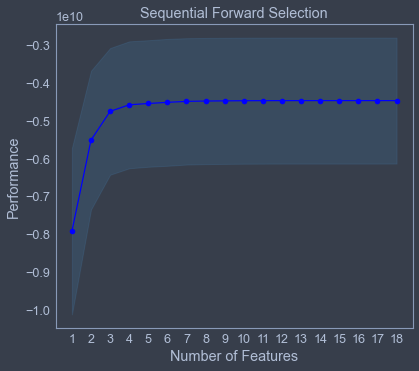

In [28]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

fig1 = plot_sfs(model_sfs.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection')
plt.grid()
plt.show()

We can see that there is no gain in the performance after 5 features. Therfore, the salary can be predicted accurately using just 5 of the 18 independant variables.

#Using random forest to see if there's any improvement in prediction accuracy

In [29]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(x_train, y_train)  

RandomForestRegressor(random_state=0)

In [30]:
#Implementing the model on the test data
y_pred = regressor.predict(x_test) 

In [37]:
print('Mean Absolute Error', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2 socre ',r2_score(y_test,y_pred))

Mean Absolute Error 7712.160338446377
Mean Squared Error 2206399848.681086
Root Mean Squared Error 46972.330671163065
r2 socre  0.8834115668664059


In [38]:
#Comparing scores for linear regression and random forest
print('Mean Absolute Error for linear regression is', ae)
print('Mean Absolute Error for random forest is ', metrics.mean_absolute_error(y_test, y_pred))
print('r2 socre for linear regression is',r2)
print('r2 socre for random forest is',r2_score(y_test,y_pred))
print('mean_sqrd_error for linear regression is ',mse)
print('mean_sqrd_error for random forest is ',metrics.mean_squared_error(y_test, y_pred))
print('root_mean_squared error for linear regression is ',rmse)
print('root_mean_squared error for random forest is ',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error for linear regression is 24812.194438752427
Mean Absolute Error for random forest is  7712.160338446377
r2 socre for linear regression is 0.7665729197911878
r2 socre for random forest is 0.8834115668664059
mean_sqrd_error for linear regression is  4417534918.413681
mean_sqrd_error for random forest is  2206399848.681086
root_mean_squared error for linear regression is  66464.53880388911
root_mean_squared error for random forest is  46972.330671163065


# We can see that using the default settings for randomforest, we still get better scores than linear regression for this particular dataset. Therfore, implementing random forest for predicting salaries or totalyearly compensation is a better option. Similarly, we can predict other variables too such as bonus, stock grant value, or any of the other parameters..

# Predicting the salary for someone with 5 years of experience, who's new to the company and has a base salary of 100k, 100k in stock value, 5500 in bonusses and has a masters degree 

In [43]:
#Using randomforests
regressor.predict([[5, 0, 100000, 100000, 5500, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0 , 0, 0]])


array([208580.])

In [45]:
#Using linear regression
LR.predict([[5, 0, 100000, 100000, 5500, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0 , 0, 0]])

array([211966.91891052])